In [1]:
import pandas as pd

In [2]:
columns = ['page', 'type', 'name', 'ingredient', 'measure']
data = pd.read_csv('recipies_new_6_4k.csv', sep='\t', names=columns)
data.head(15)

,page,type,name,ingredient,measure
0,1,zagotovki,kapusta-po-gruzinski-137009,Вода,1 л
1,1,zagotovki,kapusta-po-gruzinski-137009,Сахар,90 г
2,1,zagotovki,kapusta-po-gruzinski-137009,Соль,12 г
3,1,zagotovki,kapusta-po-gruzinski-137009,Уксус 9%-ный,250 мл
4,1,zagotovki,kapusta-po-gruzinski-137009,Белокочанная капуста,1 штука
5,1,zagotovki,kapusta-po-gruzinski-137009,Свекла,1 штука
6,1,zagotovki,kapusta-po-gruzinski-137009,Морковь,1 штука
7,1,zagotovki,kapusta-po-gruzinski-137009,Перец чили,1 штука
8,1,zagotovki,kapusta-po-gruzinski-137009,Чеснок,1 головка
9,1,zagotovki,kapusta-po-gruzinski-137009,Черный перец горошком,10 штук


In [3]:
new_data = data.groupby("name").agg({"ingredient": list})
new_data['ingredient'] = new_data['ingredient'].apply(lambda x: ', '.join(x))
new_data

,ingredient
name,
abhazskaya-adzhika-138219,"Красный перец чили, Чеснок, Кинза, Красный баз..."
abrikosovaja-gorchica-28736,"Яблочный уксус, Абрикосовый джем, Горчица"
abrikosovij-sous-s-inzhirom-specijami-29634,"Свежий корень имбиря , Семена фенхеля, Зеленые..."
abrikosovoe-maslo-s-romom-26097,"Курага, Сливочное масло, Ром, Молотый миндаль,..."
achichuk-achik-chuchuk-45395,"Помидоры «бычье сердце», Красный лук, Крупная ..."
...,...
zimniy-citrusovyy-salat-s-chernym-percem-syrom-feta-i-myatoy-57132,"Красные апельсины, Мандарины, Белые грейпфруты..."
zimniy-salat-s-citrusami-57212,"Апельсины, Грейпфруты, Мандарины, Майонез, Лим..."
zimniy-salat-s-greckimi-orehami-56883,"Жареные грецкие орехи, Морковь, Сыр фета, Водя..."


In [4]:
new_data = new_data.reset_index()
new_data

,name,ingredient
0,abhazskaya-adzhika-138219,"Красный перец чили, Чеснок, Кинза, Красный баз..."
1,abrikosovaja-gorchica-28736,"Яблочный уксус, Абрикосовый джем, Горчица"
2,abrikosovij-sous-s-inzhirom-specijami-29634,"Свежий корень имбиря , Семена фенхеля, Зеленые..."
3,abrikosovoe-maslo-s-romom-26097,"Курага, Сливочное масло, Ром, Молотый миндаль,..."
4,achichuk-achik-chuchuk-45395,"Помидоры «бычье сердце», Красный лук, Крупная ..."
...,...,...
6403,zimniy-citrusovyy-salat-s-chernym-percem-syrom...,"Красные апельсины, Мандарины, Белые грейпфруты..."
6404,zimniy-salat-s-citrusami-57212,"Апельсины, Грейпфруты, Мандарины, Майонез, Лим..."
6405,zimniy-salat-s-greckimi-orehami-56883,"Жареные грецкие орехи, Морковь, Сыр фета, Водя..."
6406,zimniy-salat-s-seldereem-i-bolgarskim-percem-1...,"Белокочанная капуста, Огурцы, Сладкий перец, С..."


In [30]:
result = new_data.merge(data[["name", "type"]]).drop_duplicates()
result

,name,ingredient,type
0,abhazskaya-adzhika-138219,"Красный перец чили, Чеснок, Кинза, Красный баз...",sousy-marinady
16,abrikosovaja-gorchica-28736,"Яблочный уксус, Абрикосовый джем, Горчица",sousy-marinady
19,abrikosovij-sous-s-inzhirom-specijami-29634,"Свежий корень имбиря , Семена фенхеля, Зеленые...",sousy-marinady
27,abrikosovoe-maslo-s-romom-26097,"Курага, Сливочное масло, Ром, Молотый миндаль,...",sousy-marinady
33,achichuk-achik-chuchuk-45395,"Помидоры «бычье сердце», Красный лук, Крупная ...",salaty
...,...,...,...
62809,zimniy-citrusovyy-salat-s-chernym-percem-syrom...,"Красные апельсины, Мандарины, Белые грейпфруты...",salaty
62820,zimniy-salat-s-citrusami-57212,"Апельсины, Грейпфруты, Мандарины, Майонез, Лим...",salaty
62846,zimniy-salat-s-greckimi-orehami-56883,"Жареные грецкие орехи, Морковь, Сыр фета, Водя...",salaty
62854,zimniy-salat-s-seldereem-i-bolgarskim-percem-1...,"Белокочанная капуста, Огурцы, Сладкий перец, С...",zagotovki


In [6]:
from sklearn.cluster import KMeans

In [7]:
# импортируем TF-IDF
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [10]:
# задаем параметры (добавим стоп-слова)
stops = stopwords.words("english")

tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=5,
    analyzer="word", # анализировать по словам или по символам (char)
    stop_words=stops # передаём список стоп-слов из NLTK
)

In [11]:
# обучаем TF-IDF
X = tfidf.fit_transform(new_data['ingredient']).todense()

new_cols=tfidf.get_feature_names()

print(X.shape)

(6408, 873)


In [12]:
new_data.head()

,name,ingredient
0,abhazskaya-adzhika-138219,"Красный перец чили, Чеснок, Кинза, Красный баз..."
1,abrikosovaja-gorchica-28736,"Яблочный уксус, Абрикосовый джем, Горчица"
2,abrikosovij-sous-s-inzhirom-specijami-29634,"Свежий корень имбиря , Семена фенхеля, Зеленые..."
3,abrikosovoe-maslo-s-romom-26097,"Курага, Сливочное масло, Ром, Молотый миндаль,..."
4,achichuk-achik-chuchuk-45395,"Помидоры «бычье сердце», Красный лук, Крупная ..."


In [13]:
new_data1 = new_data.drop('ingredient',axis=1)
new_data1

,name
0,abhazskaya-adzhika-138219
1,abrikosovaja-gorchica-28736
2,abrikosovij-sous-s-inzhirom-specijami-29634
3,abrikosovoe-maslo-s-romom-26097
4,achichuk-achik-chuchuk-45395
...,...
6403,zimniy-citrusovyy-salat-s-chernym-percem-syrom...
6404,zimniy-salat-s-citrusami-57212
6405,zimniy-salat-s-greckimi-orehami-56883
6406,zimniy-salat-s-seldereem-i-bolgarskim-percem-1...


In [14]:
# join the tfidf values to the existing dataframe
df = new_data1.join(pd.DataFrame(X, columns=new_cols))

In [15]:
# X['id'] = X['type'].map(hash)
X = df.dropna()
X.head()

,name,10,15,20,25,30,33,35,40,extra,...,яблоки,яблоко,яблочный,ягоды,ядра,язык,яичная,яичный,яйцо,ячмень
0,abhazskaya-adzhika-138219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abrikosovaja-gorchica-28736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.466977,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abrikosovij-sous-s-inzhirom-specijami-29634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abrikosovoe-maslo-s-romom-26097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,achichuk-achik-chuchuk-45395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X['id'] = X['name'].map(hash)
X.head()

,name,10,15,20,25,30,33,35,40,extra,...,яблоко,яблочный,ягоды,ядра,язык,яичная,яичный,яйцо,ячмень,id
0,abhazskaya-adzhika-138219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2079022895202103213
1,abrikosovaja-gorchica-28736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.466977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1986845918530746854
2,abrikosovij-sous-s-inzhirom-specijami-29634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8808744255818877298
3,abrikosovoe-maslo-s-romom-26097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8349288543395371975
4,achichuk-achik-chuchuk-45395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2127585482720299406


In [17]:
X1 = X.drop('name', axis=1)

In [18]:
X1.head()

,10,15,20,25,30,33,35,40,extra,mix,...,яблоко,яблочный,ягоды,ядра,язык,яичная,яичный,яйцо,ячмень,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2079022895202103213
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.466977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1986845918530746854
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8808744255818877298
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8349288543395371975
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2127585482720299406


In [19]:
# примените метод локтя (см. код выше)

distortions = []
cluster_range = range(1, 10)
for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(X1)
    distortions.append(model.inertia_)

Text(0, 0.5, 'Сумма квадратов расстояний')

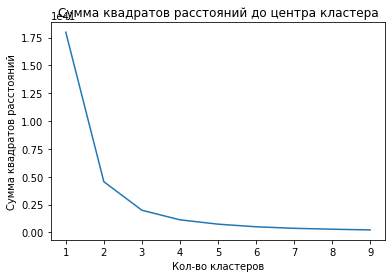

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=cluster_range, y=distortions)
plt.title("Сумма квадратов расстояний до центра кластера")
plt.xlabel("Кол-во кластеров")
plt.ylabel("Сумма квадратов расстояний")

In [21]:
# создаем модель и задаем параметры K-means

model = KMeans(n_clusters=3, random_state=1)

In [22]:
# обучаем
model.fit(X1)

KMeans(n_clusters=3, random_state=1)

In [23]:
clusters = model.predict(X1)

In [24]:
# сохраняем предсказания в датафрейм
def clusters_stats(clusters):
    
    # делаем копию датасета и сохраняем метки кластеров туда
    data_with_labels = X1.copy()
    data_with_labels["cluster"] = clusters
    
    # смотрим сочетания меток видов и кластеров
    data_with_labels["i"] = 1
    print(data_with_labels.pivot_table(index="id", columns="cluster", values="i", aggfunc="sum").fillna(""))
    print("-" * 50)

In [25]:
clusters_stats(clusters)

cluster                 0    1 2 
id                               
-9222770272992109295  1.0        
-9221245399704823944  1.0        
-9220389988972683290  1.0        
-9212508291580136253  1.0        
-9211174684720130916  1.0        
...                   ...  ... ..
 9210057364847457909       1.0   
 9212814965665849262       1.0   
 9219508508018829676       1.0   
 9220222381107544401       1.0   
 9220555024750000678       1.0   

[6408 rows x 3 columns]
--------------------------------------------------


In [26]:
data_with_labels = X1.copy()
data_with_labels["cluster"] = clusters
clusters

array([2, 2, 1, ..., 2, 1, 1], dtype=int32)

In [27]:
data_with_labels["i"] = 1
data_with_labels.pivot_table(index="id", columns="cluster", values="i", aggfunc="sum").fillna("")

cluster,0,1,2
id,,,
-9222770272992109295,1.0,,
-9221245399704823944,1.0,,
-9220389988972683290,1.0,,
-9212508291580136253,1.0,,
-9211174684720130916,1.0,,
...,...,...,...
9210057364847457909,,1.0,
9212814965665849262,,1.0,
9219508508018829676,,1.0,


In [28]:
cluster_data = data_with_labels.pivot_table(index="id", columns="cluster", values="i", aggfunc="sum").fillna("").reset_index()
cluster_data

cluster,id,0,1,2
0,-9222770272992109295,1.0,,
1,-9221245399704823944,1.0,,
2,-9220389988972683290,1.0,,
3,-9212508291580136253,1.0,,
4,-9211174684720130916,1.0,,
...,...,...,...,...
6403,9210057364847457909,,1.0,
6404,9212814965665849262,,1.0,
6405,9219508508018829676,,1.0,
6406,9220222381107544401,,1.0,


In [33]:
X.merge(cluster_data).merge(result).head(50)[['name', 'id', 0, 1, 2, 'ingredient', 'type']]

,name,id,0,1,2,ingredient,type
0,abhazskaya-adzhika-138219,-2079022895202103213,,,1.0,"Красный перец чили, Чеснок, Кинза, Красный баз...",sousy-marinady
1,abrikosovaja-gorchica-28736,-1986845918530746854,,,1.0,"Яблочный уксус, Абрикосовый джем, Горчица",sousy-marinady
2,abrikosovij-sous-s-inzhirom-specijami-29634,8808744255818877298,,1.0,,"Свежий корень имбиря , Семена фенхеля, Зеленые...",sousy-marinady
3,abrikosovoe-maslo-s-romom-26097,-8349288543395371975,1.0,,,"Курага, Сливочное масло, Ром, Молотый миндаль,...",sousy-marinady
4,achichuk-achik-chuchuk-45395,-2127585482720299406,,,1.0,"Помидоры «бычье сердце», Красный лук, Крупная ...",salaty
5,adigejskaja-sol-35677,-6285913692547422995,1.0,,,"Чеснок, Молотый черный перец, Молотый красный ...",sousy-marinady
6,adzhab-sandal-49955,-1492409490424795510,,,1.0,"Баклажаны, Сладкий перец, Сладкий красный лук,...",salaty
7,adzhada-chesnochnaja-lazanja-14583,5902788549680180538,,1.0,,"Чеснок, Оливковое масло, Сливочное масло, Терт...",pasta-picca
8,adzhika-po-domashnemu-94067,6494279133000563903,,1.0,,"Помидоры, Красный сладкий перец, Репчатый лук,...",sousy-marinady
9,adzhika-po-domashnemu-s-jablokami-46771,8034221377229307190,,1.0,,"Помидоры, Сладкий перец, Яблоко, Хрен, Чеснок,...",sousy-marinady


In [38]:
new_data

,name,ingredient
0,abhazskaya-adzhika-138219,"Красный перец чили, Чеснок, Кинза, Красный баз..."
1,abrikosovaja-gorchica-28736,"Яблочный уксус, Абрикосовый джем, Горчица"
2,abrikosovij-sous-s-inzhirom-specijami-29634,"Свежий корень имбиря , Семена фенхеля, Зеленые..."
3,abrikosovoe-maslo-s-romom-26097,"Курага, Сливочное масло, Ром, Молотый миндаль,..."
4,achichuk-achik-chuchuk-45395,"Помидоры «бычье сердце», Красный лук, Крупная ..."
...,...,...
6403,zimniy-citrusovyy-salat-s-chernym-percem-syrom...,"Красные апельсины, Мандарины, Белые грейпфруты..."
6404,zimniy-salat-s-citrusami-57212,"Апельсины, Грейпфруты, Мандарины, Майонез, Лим..."
6405,zimniy-salat-s-greckimi-orehami-56883,"Жареные грецкие орехи, Морковь, Сыр фета, Водя..."
6406,zimniy-salat-s-seldereem-i-bolgarskim-percem-1...,"Белокочанная капуста, Огурцы, Сладкий перец, С..."


In [37]:
names = new_data['name'].tolist()
names

['abhazskaya-adzhika-138219',
 'abrikosovaja-gorchica-28736',
 'abrikosovij-sous-s-inzhirom-specijami-29634',
 'abrikosovoe-maslo-s-romom-26097',
 'achichuk-achik-chuchuk-45395',
 'adigejskaja-sol-35677',
 'adzhab-sandal-49955',
 'adzhada-chesnochnaja-lazanja-14583',
 'adzhika-po-domashnemu-94067',
 'adzhika-po-domashnemu-s-jablokami-46771',
 'adzhika-s-antonovskimi-jablokami-51074',
 'adzhika-s-jablokami-morkovju-29072',
 'adzhika-s-percem-chili-14833',
 'adzhika-s-pomidorami-31554',
 'ajoli-ot-shefa-pola-gejlera-52825',
 'ambroziya-104238',
 'amerikanskaja-zapravka-iz-golubogo-sira-i-chesnoka-54234',
 'amerikanskij-kapustnij-salat-16218',
 'amerikanskij-salat-s-avokado-gribami-i-golubim-sirom-54219',
 'ananasi-luk-porej-i-kurica-pod-sousom-karri-41704',
 'ananasovaja-salsa-s-percami-halapeno-28554',
 'ananasovij-marinad-s-percami-chipotle-27722',
 'ananasovij-salat-s-vetchinoj-28014',
 'ananasovij-sous-55954',
 'ananasovo-chesnochnij-salat-28068',
 'andaluzskij-majonez-26058',
 'anda